In [1]:
import pandas as pd

In [71]:
lot = pd.read_csv('../../../../Downloads/lot.csv')
lot = lot[['person_id', 'start_date', 'line_number', 'regimen_codes_sorted', 'end_date']]
lot['end_date'] = pd.to_datetime(lot['end_date'])
lot['start_date'] = pd.to_datetime(lot['start_date'])
lot['treatment_duration'] = (lot['end_date'] - lot['start_date']).dt.days
lot['censor'] = lot['end_date'].apply(lambda x:1 if x < pd.to_datetime('2018-11-01', format = '%Y-%m-%d') else 0)
io_agents = lot.regimen_codes_sorted.unique().tolist()
nivolumab = [s for s in io_agents if "nivolumab" in s.lower()]
ipilimumab = [s for s in io_agents if "ipilimumab" in s.lower()]
bevacizumab = [s for s in io_agents if "bevacizumab" in s.lower()]
avelumab = [s for s in io_agents if "avelumab" in s.lower()]
pembrolizumab = [s for s in io_agents if "pembrolizumab" in s.lower()]
io_agents = nivolumab + ipilimumab + bevacizumab + pembrolizumab + avelumab
lot['io_agents'] = lot['regimen_codes_sorted'].apply(lambda x:'IO' if x in io_agents else 'NON IO')
lot1 = lot[lot['line_number']==1][['person_id', 'regimen_codes_sorted', 'censor', 'treatment_duration', 'io_agents']]
lot2 = lot[lot['line_number']==2][['person_id', 'regimen_codes_sorted', 'censor', 'treatment_duration', 'io_agents']]
t = lot1.merge(lot2, how='left', on='person_id')
t['regimen_codes_sorted_y'] = t['regimen_codes_sorted_y'].fillna('No 2L')
t = t[t['regimen_codes_sorted_y']=='cabozantinib']

In [64]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
figsize(12,8)

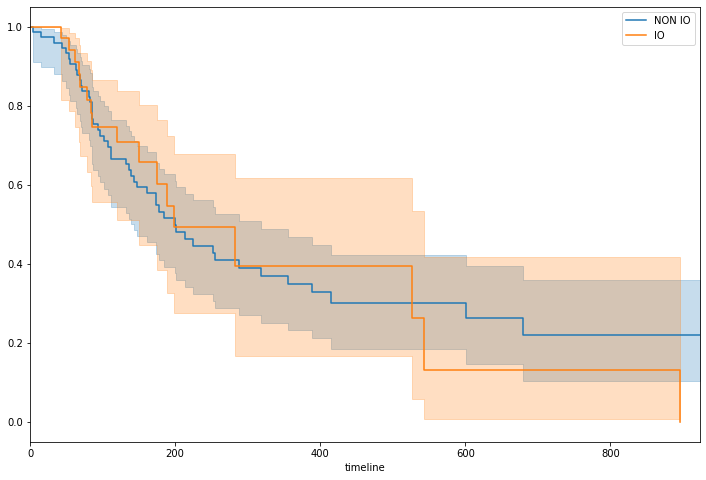

In [72]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

groups = t['io_agents_x']   
i1 = (groups == 'NON IO')
i2 = (groups == 'IO')
T = t['treatment_duration_y']
E = t['censor_y']

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='NON IO')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='IO')
kmf1.plot(ax=a1)